In [106]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import cv2
import math
%matplotlib inline

# contour detection

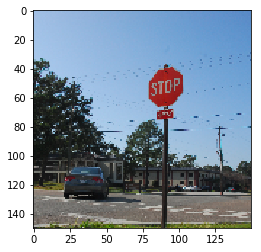

In [16]:
image = cv2.imread('stopsign.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (300, 200))
image = image[0:150, 100:250, :] # scope to stop sign
original = np.copy(image)
plt.imshow(image)

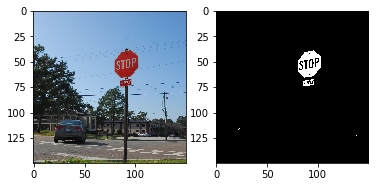

In [80]:
# create a binary image to detect contours in (here only red)

lower_red = np.array([100,0,0])
upper_red = np.array([255,60,60])

# Mask the image 
image = np.copy(original)
mask = cv2.inRange(image, lower_red, upper_red)

image[mask > 0] = [255, 255, 255]
image[mask == 0] = [0, 0, 0]

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
# Display it
plt.subplot(121)
plt.imshow(original)
plt.subplot(122)
plt.imshow(binary, cmap='gray')

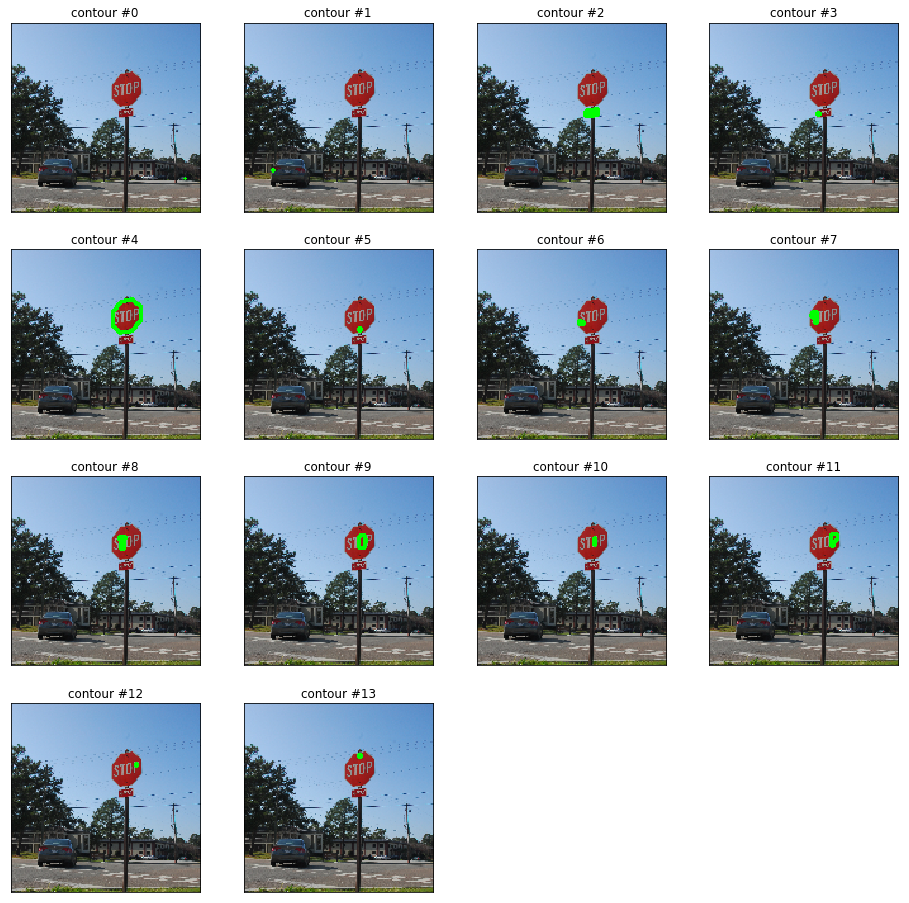

In [83]:
# draw all the contours that were found
## finding multiple contours because the binary image has multiple edges
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # syntax for opencv 2.4

cols = 4
rows = math.ceil(len(contours) / cols) + 1
plt.figure(figsize=(16, 16))
plt.subplot(cols, rows, 1)
for i in range(len(contours)):
    plt.subplot(cols, rows, i+1)
    image_contours = np.copy(original)
    cv2.drawContours(image_contours, contours, i, (0, 255, 0), 2)
    plt.imshow(image_contours)
    plt.title("contour #{}".format(i))
    plt.xticks([]), plt.yticks([])

contour #4 seems to be the main sign contour

# orientation detection

Image taken from https://www.publicdomainpictures.net/en/view-image.php?image=174629&picture=hand-with-thumb-up-and-down under CC0 Public Domain

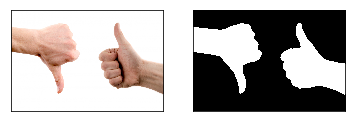

In [93]:
image = cv2.imread('thumbs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (600, 400))
original = np.copy(image)

plt.subplot(121)
plt.imshow(original)
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray')
plt.xticks([]), plt.yticks([]);

In [94]:
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Found {} contours".format(len(contours)))

Found 2 contours


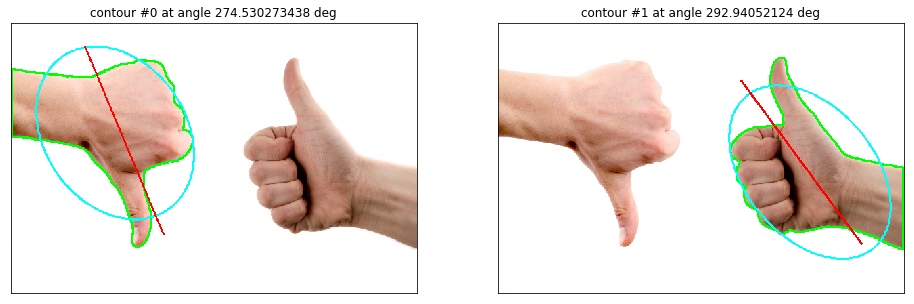

In [137]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
for i in range(len(contours)):
    plt.subplot(1, 2, i+1)
    image_contours = np.copy(original)
    # draw the contour in green
    cv2.drawContours(image_contours, contours, i, (0, 255, 0), 2)
    
    # plot a fitted ellipse in cyan
    ellipse = cv2.fitEllipse(contours[i])
    cv2.ellipse(image_contours, ellipse, (0, 255, 255), 2)
    
    [vx,vy,x,y] = cv2.fitLine(contours[i], cv2.cv.CV_DIST_L2, 0, 0.01, 0.01)
    line_length = 300
    # plot a fitted line in red
    cv2.line(image_contours, (x - vx*line_length/2, y - vy*line_length/2), (x + vx*line_length/2, y + vy*line_length/2),(255,0,0),2)
    
    plt.imshow(image_contours)
    plt.title("contour #{} at angle {} deg".format(i, ellipse[1][1]))
    plt.xticks([]), plt.yticks([])

# Hough Line detection

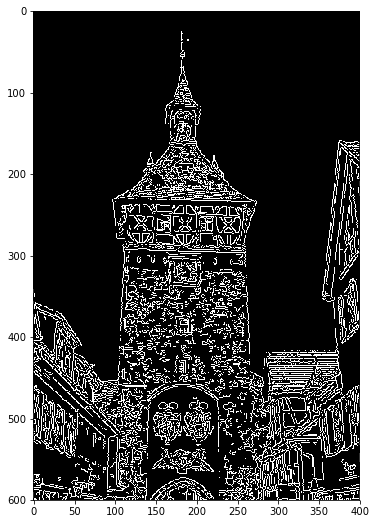

In [140]:
image = cv2.imread('torturm.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400, 600)) 
original = np.copy(image)

# extract edges using canny edge detection
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
lower = 100
upper = 200
edges = cv2.Canny(gray, lower, upper)
plt.figure(figsize=(14, 9))
plt.imshow(edges, cmap='gray')

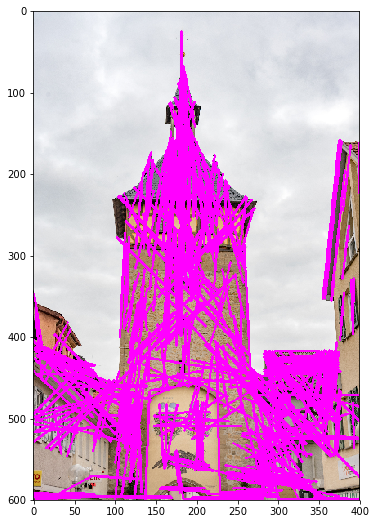

In [168]:
# find lines in hough space
rho = 1 # 1 pix
theta = np.pi/180 # 1 degree
threshold = 60
min_line_length = 50
max_line_gap = 10
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
image_lines = np.copy(original)
for l in lines:
    for x1, y1, x2, y2 in l:
        cv2.line(image_lines, (x1, y1), (x2, y2), (255, 0, 255), 2)
plt.figure(figsize=(15,9))
plt.imshow(image_lines)

Looks like hough space doesn't work so well for houses :/